In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
stroke_df=pd.read_csv('Resources/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#round glucose level column to 1 decimal place
stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].round(1)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.2,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1


In [5]:
# look at dtypes
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
stroke_df['age']=stroke_df['age'].astype(int)
stroke_df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
#look at ID count and compare later
stroke_df['id'].count()

5110

In [8]:
#drop any null values from dataset
stroke_df.dropna(how='any', axis=0, inplace=True)
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.2,29.0,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.1,27.4,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.4,22.8,never smoked,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.6,24.2,Unknown,1
10,12109,Female,81,1,0,Yes,Private,Rural,80.4,29.7,never smoked,1
11,12095,Female,61,0,1,Yes,Govt_job,Rural,120.5,36.8,smokes,1


In [9]:
# double check for null values
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#get rid of any duplicates
stroke_df.drop_duplicates(subset= 'id', keep='first', inplace=True)


In [11]:
#look at unique values 
stroke_df.nunique()

id                   4909
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    1305
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
stroke_df['id'].count()
# removed 201 rows by dropping duplicates and NaN values

4909

<function matplotlib.pyplot.show(close=None, block=None)>

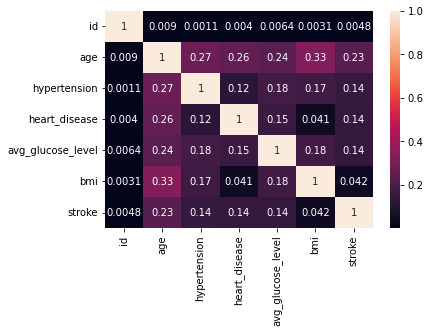

In [13]:
#try to make a correlation matrix to see of variables interact with eachother 
corrMatrix = stroke_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show

In [14]:
# make new dataframe and remove ID column and then make a new correlation matrix 
corr_df = stroke_df.drop('id', axis=1) 
corr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.2,29.0,formerly smoked,1


<function matplotlib.pyplot.show(close=None, block=None)>

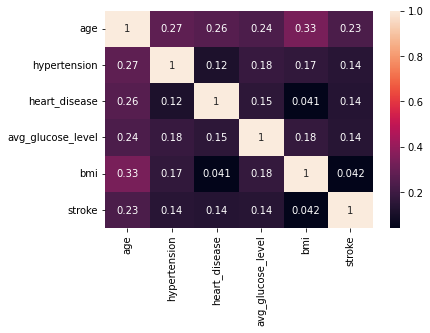

In [15]:
corrMatrix2 = corr_df.corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show

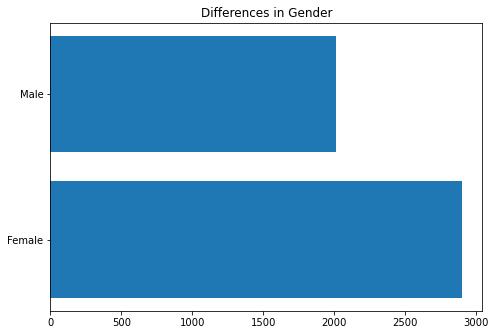

Percentage of Female Patients in Dataset: 0.5902607986960066
Percentage of Male Patients in Dataset: 0.4097392013039935


In [16]:
# look at differences in gender 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Female", "Male"]
x = corr_df["gender"].value_counts()['Female']
y = corr_df["gender"].value_counts()['Male']
counts = [x, y]
ax.barh(gender, counts)
plt.title("Differences in Gender")
plt.show()

print("Percentage of Female Patients in Dataset:", x/(x+y))
print("Percentage of Male Patients in Dataset:", y/(x+y))

#Need to drop 'other' gender in future as it is responsible for only .0002% of patients


<function matplotlib.pyplot.show(close=None, block=None)>

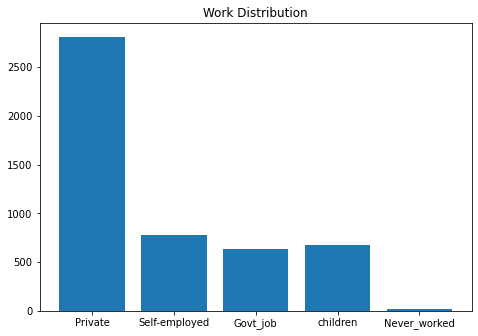

In [17]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
values = ["Private", "Self-employed","Govt_job", "children", "Never_worked"]

a = corr_df["work_type"].value_counts()["Private"]
b = corr_df["work_type"].value_counts()["Self-employed"]
c = corr_df["work_type"].value_counts()["Govt_job"]
d = corr_df["work_type"].value_counts()["children"]
e = corr_df["work_type"].value_counts()["Never_worked"]

counts = [a, b, c, d, e]

ax.bar(values, counts)
plt.title ("Work Distribution")
plt.show


Try data preprocessing for ML model 

In [18]:
corr_df.dtypes

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
corr_df.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    1305
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [20]:
# look at glucose level for binning
glucose_df = corr_df["avg_glucose_level"].value_counts()
glucose_df

82.4     18
84.1     16
90.4     16
85.8     16
82.6     16
         ..
187.0     1
213.2     1
122.9     1
201.1     1
166.3     1
Name: avg_glucose_level, Length: 1305, dtype: int64

<AxesSubplot:ylabel='Density'>

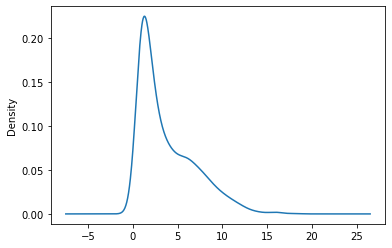

In [21]:
corr_df["avg_glucose_level"].value_counts().plot.density()

In [22]:
# Determine which values to replace if counts are less than ...?
replace_glucose= glucose_df[glucose_df < 4].index.tolist()

# Replace in dataframe
for glucose in replace_glucose:
    corr_df.avg_glucose_level = corr_df.avg_glucose_level.replace(glucose,"Other")
    
# Check to make sure binning was successful
corr_df.avg_glucose_level.value_counts()

Other    1252
82.4       18
90.4       16
82.6       16
85.8       16
         ... 
70.4        4
64.6        4
109.0       4
91.4        4
112.8       4
Name: avg_glucose_level, Length: 530, dtype: int64

In [23]:
#bmi for binding
bmi_df= corr_df["bmi"].value_counts()
bmi_df.head

<bound method NDFrame.head of 28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64>

<AxesSubplot:ylabel='Density'>

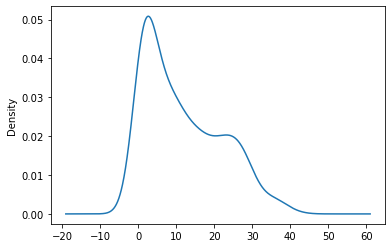

In [24]:
corr_df["bmi"].value_counts().plot.density()

In [25]:
# Determine which values to replace if counts are less than ...?
replace_bmi= bmi_df[bmi_df < 15].index.tolist()

# Replace in dataframe
for bmi in replace_bmi:
    corr_df.bmi = corr_df.bmi.replace(bmi,"Other")
    
# Check to make sure binning was successful
corr_df["bmi"].value_counts()

Other    1383
28.7       41
28.4       38
26.1       37
26.7       37
         ... 
35.6       15
25.7       15
33.0       15
36.7       15
18.8       15
Name: bmi, Length: 151, dtype: int64

In [26]:
# look at age for binning
age_df = corr_df["age"].value_counts()
age_df

57    93
78    93
52    85
54    84
51    83
      ..
11    36
4     34
10    34
7     31
6     23
Name: age, Length: 83, dtype: int64

<AxesSubplot:ylabel='Density'>

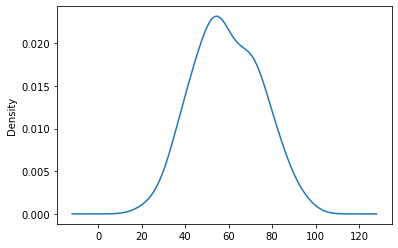

In [27]:
corr_df["age"].value_counts().plot.density()

Don't feel comfortable binning age 

In [28]:
# look at types on more time before encoding 
corr_df.dtypes

gender               object
age                   int64
hypertension          int64
heart_disease         int64
ever_married         object
work_type            object
Residence_type       object
avg_glucose_level    object
bmi                  object
smoking_status       object
stroke                int64
dtype: object

In [29]:
#encode variables with only two options first 
enc = preprocessing.LabelEncoder()
corr_df["gender"] = enc.fit_transform(corr_df["gender"])
corr_df["ever_married"] = enc.fit_transform(corr_df["ever_married"])
corr_df["Residence_type"] = enc.fit_transform(corr_df["Residence_type"])

In [30]:
# multiple options for work and smoking status, use get dummies
corr_df=pd.get_dummies(corr_df)
corr_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,bmi_35.2,bmi_35.6,bmi_35.8,bmi_35.9,bmi_36.7,bmi_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,1,80,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,49,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,79,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,81,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,1,74,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,0,69,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,0,78,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10,0,81,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11,0,61,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:
# Split our preprocessed data into our features and target arrays
y = corr_df.loc[:, "stroke"].values
X = corr_df.drop(columns=["stroke"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                16728     
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 17,041
Trainable params: 17,041
Non-trainable params: 0
_________________________________________________________________


2022-07-27 09:20:42.156431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
#train the model
fit_model = nn.fit(X_train, y_train, epochs=200)

Epoch 1/200
116/116 [==============================] - 1s 1ms/step - loss: 0.2269 - accuracy: 0.9603
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.9603
Epoch 3/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9603
Epoch 4/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9603
Epoch 5/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9603
Epoch 6/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.9603
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9603
Epoch 8/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9603
Epoch 9/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9603
Epoch 10/200
116/116 [==============================] - 0s 1ms/step - loss: 0.1402 - accura

116/116 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9756
Epoch 82/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9750
Epoch 83/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9707
Epoch 84/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9742
Epoch 85/200
116/116 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9739
Epoch 86/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9761
Epoch 87/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9728
Epoch 88/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9772
Epoch 89/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9756
Epoch 90/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 

116/116 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.9810
Epoch 161/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9856
Epoch 162/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9864
Epoch 163/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9864
Epoch 164/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9859
Epoch 165/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9872
Epoch 166/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9875
Epoch 167/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9872
Epoch 168/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9878
Epoch 169/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0319 - a

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 2.4528 - accuracy: 0.6735 - 154ms/epoch - 4ms/step
Loss: 2.452782154083252, Accuracy: 0.6734527945518494


In [40]:
# try random forest 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_preds)
print(f"Accuracy: , {accuracy}, Loss: {model_loss}")

Accuracy: , 0.9470684039087948, Loss: 2.452782154083252
